In [56]:

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics

In [4]:
data = pd.read_csv("database.csv")

In [5]:
#data.head(5)

In [6]:
X = pd.DataFrame()

### Kfold function from sklearn

In [7]:
kf = KFold(5, shuffle=True, random_state=42)

In [8]:
_Y = []
_pred = []

In [9]:
df = data[["JSC", "HOMO-D", "LUMO-D", "VOC", "PCE", "SMILES-DFP", "SMILES-AFP"]]

In [10]:
X['HOMO'] = df['HOMO-D']
X['LUMO'] = df['LUMO-D']

In [11]:
Y = df["PCE"]

In [12]:
fold = 0

### Training

In [13]:
for train, test in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    
    model = Sequential()
    model.add(Dense(64, input_dim = 2, activation = 'relu'))
    model.add(Dropout(0.15))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dropout(0.15))
    model.add(Dense(54, activation = 'relu'))
    model.add(Dropout(0.18))
    model.add(Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(lr=0.0007)
    model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mse', 'mae'])
    history = model.fit(X_train, Y_train, validation_split=0.2, epochs=300)
    
    scores = model.evaluate(X_test, Y_test, verbose = 0)
    print('Mean Squared Error : ', scores[1])
    print('Mean Absolute Error : ', scores[2])
    
    pred = model.predict(X_test)
    
    _Y.append(Y_test)
    _pred.append(pred)
    
    score = np.sqrt(metrics.mean_squared_error(pred, Y_test))
    print(f"Fold score (RMSE): {score}")
    
    #_Y = pd.DataFrame(_Y)
    #_pred = pd.DataFrame(_pred)
    

Fold #1


2022-12-12 14:27:31.692994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 14:27:31.789721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 14:27:31.789871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 14:27:31.791096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

Epoch 1/300


2022-12-12 14:27:34.672893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-12 14:27:34.698258: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1d7fa2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-12 14:27:34.698272: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-12-12 14:27:34.715139: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-12 14:27:34.824902: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-12 14:27:34.883502: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at 

12/12 [==============================] - 3s 17ms/step - loss: 16.8203 - mse: 16.8203 - mae: 3.2922 - val_loss: 15.4138 - val_mse: 15.4138 - val_mae: 3.1618
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 8.6081 - mse: 8.6081 - mae: 2.3227 - val_loss: 6.6571 - val_mse: 6.6571 - val_mae: 2.0988
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 6.8667 - mse: 6.8667 - mae: 2.1695 - val_loss: 7.0766 - val_mse: 7.0766 - val_mae: 2.1468
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 6.8281 - mse: 6.8281 - mae: 2.1634 - val_loss: 7.8049 - val_mse: 7.8049 - val_mae: 2.2277
Epoch 5/300
12/12 [==============================] - 0s 6ms/step - loss: 6.6783 - mse: 6.6783 - mae: 2.1267 - val_loss: 7.2117 - val_mse: 7.2117 - val_mae: 2.1654
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 6.9256 - mse: 6.9256 - mae: 2.1792 - val_loss: 7.5529 - val_mse: 7.5529 - val_mae: 2.2038
Epoch 7/300
12/12 [==========

12/12 [==============================] - 0s 6ms/step - loss: 6.3997 - mse: 6.3997 - mae: 2.1091 - val_loss: 7.7486 - val_mse: 7.7486 - val_mae: 2.2478
Epoch 52/300
12/12 [==============================] - 0s 6ms/step - loss: 5.9338 - mse: 5.9338 - mae: 2.0023 - val_loss: 7.8501 - val_mse: 7.8501 - val_mae: 2.2590
Epoch 53/300
12/12 [==============================] - 0s 6ms/step - loss: 6.2452 - mse: 6.2452 - mae: 2.0729 - val_loss: 7.9443 - val_mse: 7.9443 - val_mae: 2.2683
Epoch 54/300
12/12 [==============================] - 0s 5ms/step - loss: 6.4500 - mse: 6.4500 - mae: 2.0809 - val_loss: 8.3378 - val_mse: 8.3378 - val_mae: 2.3045
Epoch 55/300
12/12 [==============================] - 0s 6ms/step - loss: 6.3535 - mse: 6.3535 - mae: 2.0761 - val_loss: 7.5154 - val_mse: 7.5154 - val_mae: 2.2198
Epoch 56/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2173 - mse: 6.2173 - mae: 2.0857 - val_loss: 7.9261 - val_mse: 7.9261 - val_mae: 2.2658
Epoch 57/300
12/12 [=========

12/12 [==============================] - 0s 5ms/step - loss: 5.8950 - mse: 5.8950 - mae: 1.9987 - val_loss: 8.2043 - val_mse: 8.2043 - val_mae: 2.2854
Epoch 102/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8304 - mse: 5.8304 - mae: 2.0142 - val_loss: 7.0358 - val_mse: 7.0358 - val_mae: 2.1551
Epoch 103/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9523 - mse: 5.9523 - mae: 2.0161 - val_loss: 7.8824 - val_mse: 7.8824 - val_mae: 2.2577
Epoch 104/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0245 - mse: 6.0245 - mae: 2.0382 - val_loss: 7.5961 - val_mse: 7.5961 - val_mae: 2.2245
Epoch 105/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8148 - mse: 5.8148 - mae: 2.0238 - val_loss: 7.7623 - val_mse: 7.7623 - val_mae: 2.2459
Epoch 106/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6733 - mse: 5.6733 - mae: 1.9725 - val_loss: 7.6365 - val_mse: 7.6365 - val_mae: 2.2328
Epoch 107/300
12/12 [===

Epoch 151/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6860 - mse: 5.6860 - mae: 1.9773 - val_loss: 7.6327 - val_mse: 7.6327 - val_mae: 2.2196
Epoch 152/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7362 - mse: 5.7362 - mae: 1.9725 - val_loss: 7.7711 - val_mse: 7.7711 - val_mae: 2.2345
Epoch 153/300
12/12 [==============================] - 0s 6ms/step - loss: 5.7559 - mse: 5.7559 - mae: 1.9940 - val_loss: 7.5591 - val_mse: 7.5591 - val_mae: 2.2076
Epoch 154/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7944 - mse: 5.7944 - mae: 1.9886 - val_loss: 7.6009 - val_mse: 7.6009 - val_mae: 2.2133
Epoch 155/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7297 - mse: 5.7297 - mae: 1.9621 - val_loss: 7.4534 - val_mse: 7.4534 - val_mae: 2.1990
Epoch 156/300
12/12 [==============================] - 0s 6ms/step - loss: 5.9308 - mse: 5.9308 - mae: 2.0048 - val_loss: 7.5838 - val_mse: 7.5838 - val_mae: 2.2114
Epoch 157/

Epoch 201/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5638 - mse: 5.5638 - mae: 1.9102 - val_loss: 7.4895 - val_mse: 7.4895 - val_mae: 2.2009
Epoch 202/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7169 - mse: 5.7169 - mae: 1.9685 - val_loss: 7.3581 - val_mse: 7.3581 - val_mae: 2.1904
Epoch 203/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6600 - mse: 5.6600 - mae: 1.9845 - val_loss: 7.3798 - val_mse: 7.3798 - val_mae: 2.1939
Epoch 204/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7329 - mse: 5.7329 - mae: 1.9672 - val_loss: 7.6870 - val_mse: 7.6870 - val_mae: 2.2225
Epoch 205/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5655 - mse: 5.5655 - mae: 1.9494 - val_loss: 7.2818 - val_mse: 7.2818 - val_mae: 2.1839
Epoch 206/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8018 - mse: 5.8018 - mae: 1.9840 - val_loss: 7.5312 - val_mse: 7.5312 - val_mae: 2.2092
Epoch 207/

Epoch 251/300
12/12 [==============================] - 0s 5ms/step - loss: 5.4842 - mse: 5.4842 - mae: 1.9144 - val_loss: 7.2398 - val_mse: 7.2398 - val_mae: 2.1762
Epoch 252/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7553 - mse: 5.7553 - mae: 1.9782 - val_loss: 7.3986 - val_mse: 7.3986 - val_mae: 2.1927
Epoch 253/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6904 - mse: 5.6904 - mae: 1.9512 - val_loss: 7.5405 - val_mse: 7.5405 - val_mae: 2.2062
Epoch 254/300
12/12 [==============================] - 0s 5ms/step - loss: 5.4971 - mse: 5.4971 - mae: 1.9214 - val_loss: 7.2630 - val_mse: 7.2630 - val_mae: 2.1768
Epoch 255/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6717 - mse: 5.6717 - mae: 1.9575 - val_loss: 7.4827 - val_mse: 7.4827 - val_mae: 2.1995
Epoch 256/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6866 - mse: 5.6866 - mae: 1.9547 - val_loss: 7.5213 - val_mse: 7.5213 - val_mae: 2.2028
Epoch 257/

Mean Squared Error :  4.54145622253418
Mean Absolute Error :  1.7138147354125977
4/4 [==============================] - 0s 2ms/step
Fold score (RMSE): 2.1310692631882424
Fold #2


Epoch 1/300
12/12 [==============================] - 1s 13ms/step - loss: 15.9716 - mse: 15.9716 - mae: 3.2149 - val_loss: 16.5429 - val_mse: 16.5429 - val_mae: 3.2472
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 8.4493 - mse: 8.4493 - mae: 2.3081 - val_loss: 7.3239 - val_mse: 7.3239 - val_mae: 2.2263
Epoch 3/300
12/12 [==============================] - 0s 5ms/step - loss: 7.1373 - mse: 7.1373 - mae: 2.2095 - val_loss: 7.2974 - val_mse: 7.2974 - val_mae: 2.2224
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 6.9110 - mse: 6.9110 - mae: 2.1180 - val_loss: 8.7603 - val_mse: 8.7603 - val_mae: 2.3849
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 6.5464 - mse: 6.5464 - mae: 2.0968 - val_loss: 7.6070 - val_mse: 7.6070 - val_mae: 2.2638
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 6.4191 - mse: 6.4191 - mae: 2.0922 - val_loss: 7.7285 - val_mse: 7.7285 - val_mae: 2.2785
Epoch 7/300
12/12

Epoch 51/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1245 - mse: 6.1245 - mae: 2.0126 - val_loss: 8.8803 - val_mse: 8.8803 - val_mae: 2.3834
Epoch 52/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2023 - mse: 6.2023 - mae: 2.0904 - val_loss: 7.7428 - val_mse: 7.7428 - val_mae: 2.2704
Epoch 53/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0990 - mse: 6.0990 - mae: 2.0809 - val_loss: 8.3977 - val_mse: 8.3977 - val_mae: 2.3364
Epoch 54/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7559 - mse: 5.7559 - mae: 1.9586 - val_loss: 8.0245 - val_mse: 8.0245 - val_mae: 2.2952
Epoch 55/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1658 - mse: 6.1658 - mae: 2.0498 - val_loss: 7.7305 - val_mse: 7.7305 - val_mae: 2.2615
Epoch 56/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1412 - mse: 6.1412 - mae: 2.0692 - val_loss: 7.8449 - val_mse: 7.8449 - val_mae: 2.2742
Epoch 57/300
12/

Epoch 101/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7569 - mse: 5.7569 - mae: 1.9562 - val_loss: 8.3451 - val_mse: 8.3451 - val_mae: 2.3144
Epoch 102/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9528 - mse: 5.9528 - mae: 1.9850 - val_loss: 7.8665 - val_mse: 7.8665 - val_mae: 2.2544
Epoch 103/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6060 - mse: 5.6060 - mae: 1.9470 - val_loss: 7.5157 - val_mse: 7.5157 - val_mae: 2.2099
Epoch 104/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8965 - mse: 5.8965 - mae: 2.0186 - val_loss: 7.9492 - val_mse: 7.9492 - val_mae: 2.2608
Epoch 105/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8415 - mse: 5.8415 - mae: 1.9775 - val_loss: 7.6909 - val_mse: 7.6909 - val_mae: 2.2306
Epoch 106/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5799 - mse: 5.5799 - mae: 1.9416 - val_loss: 7.4578 - val_mse: 7.4578 - val_mae: 2.2007
Epoch 107/

Epoch 151/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6613 - mse: 5.6613 - mae: 1.9619 - val_loss: 7.3956 - val_mse: 7.3956 - val_mae: 2.1865
Epoch 152/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7817 - mse: 5.7817 - mae: 1.9742 - val_loss: 8.0063 - val_mse: 8.0063 - val_mae: 2.2638
Epoch 153/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6397 - mse: 5.6397 - mae: 1.9384 - val_loss: 7.6576 - val_mse: 7.6576 - val_mae: 2.2188
Epoch 154/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6968 - mse: 5.6968 - mae: 1.9643 - val_loss: 7.3982 - val_mse: 7.3982 - val_mae: 2.1858
Epoch 155/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6109 - mse: 5.6109 - mae: 1.9267 - val_loss: 7.9044 - val_mse: 7.9044 - val_mae: 2.2499
Epoch 156/300
12/12 [==============================] - 0s 6ms/step - loss: 5.7084 - mse: 5.7084 - mae: 1.9876 - val_loss: 7.5885 - val_mse: 7.5885 - val_mae: 2.2128
Epoch 157/

Epoch 201/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5414 - mse: 5.5414 - mae: 1.9460 - val_loss: 7.3949 - val_mse: 7.3949 - val_mae: 2.1809
Epoch 202/300
12/12 [==============================] - 0s 6ms/step - loss: 5.7444 - mse: 5.7444 - mae: 1.9665 - val_loss: 7.2331 - val_mse: 7.2331 - val_mae: 2.1582
Epoch 203/300
12/12 [==============================] - 0s 6ms/step - loss: 5.7081 - mse: 5.7081 - mae: 1.9424 - val_loss: 7.4068 - val_mse: 7.4068 - val_mae: 2.1808
Epoch 204/300
12/12 [==============================] - 0s 6ms/step - loss: 5.5855 - mse: 5.5855 - mae: 1.9496 - val_loss: 7.5154 - val_mse: 7.5154 - val_mae: 2.1959
Epoch 205/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9043 - mse: 5.9043 - mae: 1.9892 - val_loss: 7.5797 - val_mse: 7.5797 - val_mae: 2.2061
Epoch 206/300
12/12 [==============================] - 0s 6ms/step - loss: 5.4672 - mse: 5.4672 - mae: 1.9312 - val_loss: 6.9954 - val_mse: 6.9954 - val_mae: 2.1352
Epoch 207/

Epoch 251/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8304 - mse: 5.8304 - mae: 1.9851 - val_loss: 7.2397 - val_mse: 7.2397 - val_mae: 2.1598
Epoch 252/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6852 - mse: 5.6852 - mae: 1.9559 - val_loss: 7.0560 - val_mse: 7.0560 - val_mae: 2.1375
Epoch 253/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6566 - mse: 5.6566 - mae: 1.9652 - val_loss: 6.9259 - val_mse: 6.9259 - val_mae: 2.1239
Epoch 254/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5993 - mse: 5.5993 - mae: 1.9487 - val_loss: 7.1780 - val_mse: 7.1780 - val_mae: 2.1547
Epoch 255/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6822 - mse: 5.6822 - mae: 1.9453 - val_loss: 7.2339 - val_mse: 7.2339 - val_mae: 2.1627
Epoch 256/300
12/12 [==============================] - 0s 6ms/step - loss: 5.5486 - mse: 5.5486 - mae: 1.9397 - val_loss: 6.8687 - val_mse: 6.8687 - val_mae: 2.1168
Epoch 257/

Mean Squared Error :  5.053589820861816
Mean Absolute Error :  1.817838430404663
4/4 [==============================] - 0s 2ms/step
Fold score (RMSE): 2.2480190920002983
Fold #3


Epoch 1/300
12/12 [==============================] - 1s 15ms/step - loss: 15.5621 - mse: 15.5621 - mae: 3.1853 - val_loss: 9.6861 - val_mse: 9.6861 - val_mae: 2.4143
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 8.1035 - mse: 8.1035 - mae: 2.2588 - val_loss: 5.0459 - val_mse: 5.0459 - val_mae: 1.9457
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 6.6899 - mse: 6.6899 - mae: 2.1219 - val_loss: 5.1205 - val_mse: 5.1205 - val_mae: 1.9467
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 6.3652 - mse: 6.3652 - mae: 2.0799 - val_loss: 5.4261 - val_mse: 5.4261 - val_mae: 1.9680
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 6.6786 - mse: 6.6786 - mae: 2.0798 - val_loss: 5.5547 - val_mse: 5.5547 - val_mae: 1.9798
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 6.4113 - mse: 6.4113 - mae: 2.0372 - val_loss: 5.1505 - val_mse: 5.1505 - val_mae: 1.9471
Epoch 7/300
12/12 [

Epoch 51/300
12/12 [==============================] - 0s 6ms/step - loss: 5.7211 - mse: 5.7211 - mae: 1.9280 - val_loss: 5.2784 - val_mse: 5.2784 - val_mae: 1.9417
Epoch 52/300
12/12 [==============================] - 0s 6ms/step - loss: 5.8339 - mse: 5.8339 - mae: 1.9962 - val_loss: 5.2008 - val_mse: 5.2008 - val_mae: 1.9340
Epoch 53/300
12/12 [==============================] - 0s 5ms/step - loss: 5.6302 - mse: 5.6302 - mae: 1.9785 - val_loss: 5.3289 - val_mse: 5.3289 - val_mae: 1.9469
Epoch 54/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6970 - mse: 5.6970 - mae: 1.9447 - val_loss: 5.3008 - val_mse: 5.3008 - val_mae: 1.9436
Epoch 55/300
12/12 [==============================] - 0s 6ms/step - loss: 5.7564 - mse: 5.7564 - mae: 1.9597 - val_loss: 5.4503 - val_mse: 5.4503 - val_mae: 1.9592
Epoch 56/300
12/12 [==============================] - 0s 6ms/step - loss: 5.8160 - mse: 5.8160 - mae: 1.9586 - val_loss: 5.3114 - val_mse: 5.3114 - val_mae: 1.9430
Epoch 57/300
12/

Epoch 101/300
12/12 [==============================] - 0s 7ms/step - loss: 5.6865 - mse: 5.6865 - mae: 1.9460 - val_loss: 5.1214 - val_mse: 5.1214 - val_mae: 1.9224
Epoch 102/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5103 - mse: 5.5103 - mae: 1.9297 - val_loss: 5.2012 - val_mse: 5.2012 - val_mae: 1.9303
Epoch 103/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5127 - mse: 5.5127 - mae: 1.9123 - val_loss: 5.0938 - val_mse: 5.0938 - val_mae: 1.9203
Epoch 104/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9444 - mse: 5.9444 - mae: 2.0101 - val_loss: 5.1890 - val_mse: 5.1890 - val_mae: 1.9281
Epoch 105/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5658 - mse: 5.5658 - mae: 1.9602 - val_loss: 5.0145 - val_mse: 5.0145 - val_mae: 1.9145
Epoch 106/300
12/12 [==============================] - 0s 5ms/step - loss: 5.5692 - mse: 5.5692 - mae: 1.9359 - val_loss: 5.0852 - val_mse: 5.0852 - val_mae: 1.9212
Epoch 107/

Epoch 151/300
12/12 [==============================] - 0s 5ms/step - loss: 5.4950 - mse: 5.4950 - mae: 1.9522 - val_loss: 5.0817 - val_mse: 5.0817 - val_mae: 1.9210
Epoch 152/300
12/12 [==============================] - 0s 6ms/step - loss: 5.5125 - mse: 5.5125 - mae: 1.9294 - val_loss: 5.0114 - val_mse: 5.0114 - val_mae: 1.9152
Epoch 153/300
12/12 [==============================] - 0s 6ms/step - loss: 5.3393 - mse: 5.3393 - mae: 1.9048 - val_loss: 4.9073 - val_mse: 4.9073 - val_mae: 1.9098
Epoch 154/300
12/12 [==============================] - 0s 5ms/step - loss: 5.4021 - mse: 5.4021 - mae: 1.8987 - val_loss: 4.9700 - val_mse: 4.9700 - val_mae: 1.9120
Epoch 155/300
12/12 [==============================] - 0s 6ms/step - loss: 5.5101 - mse: 5.5101 - mae: 1.9194 - val_loss: 4.9849 - val_mse: 4.9849 - val_mae: 1.9127
Epoch 156/300
12/12 [==============================] - 0s 5ms/step - loss: 5.4756 - mse: 5.4756 - mae: 1.9338 - val_loss: 4.8878 - val_mse: 4.8878 - val_mae: 1.9072
Epoch 157/

Epoch 201/300
12/12 [==============================] - 0s 6ms/step - loss: 5.5649 - mse: 5.5649 - mae: 1.9330 - val_loss: 5.0007 - val_mse: 5.0007 - val_mae: 1.9161
Epoch 202/300
12/12 [==============================] - 0s 6ms/step - loss: 5.6122 - mse: 5.6122 - mae: 1.9301 - val_loss: 4.9646 - val_mse: 4.9646 - val_mae: 1.9147
Epoch 203/300
12/12 [==============================] - 0s 5ms/step - loss: 5.2931 - mse: 5.2931 - mae: 1.8539 - val_loss: 4.9016 - val_mse: 4.9016 - val_mae: 1.9109
Epoch 204/300
12/12 [==============================] - 0s 6ms/step - loss: 5.3004 - mse: 5.3004 - mae: 1.8775 - val_loss: 4.8270 - val_mse: 4.8270 - val_mae: 1.9032
Epoch 205/300
12/12 [==============================] - 0s 5ms/step - loss: 5.4216 - mse: 5.4216 - mae: 1.9170 - val_loss: 4.9005 - val_mse: 4.9005 - val_mae: 1.9055
Epoch 206/300
12/12 [==============================] - 0s 5ms/step - loss: 5.3726 - mse: 5.3726 - mae: 1.8885 - val_loss: 4.8858 - val_mse: 4.8858 - val_mae: 1.9025
Epoch 207/

Epoch 251/300
12/12 [==============================] - 0s 7ms/step - loss: 5.4108 - mse: 5.4108 - mae: 1.9155 - val_loss: 4.9257 - val_mse: 4.9257 - val_mae: 1.9096
Epoch 252/300
12/12 [==============================] - 0s 6ms/step - loss: 5.3643 - mse: 5.3643 - mae: 1.9171 - val_loss: 4.8248 - val_mse: 4.8248 - val_mae: 1.9010
Epoch 253/300
12/12 [==============================] - 0s 6ms/step - loss: 5.2876 - mse: 5.2876 - mae: 1.8810 - val_loss: 4.9089 - val_mse: 4.9089 - val_mae: 1.9074
Epoch 254/300
12/12 [==============================] - 0s 7ms/step - loss: 5.5127 - mse: 5.5127 - mae: 1.9150 - val_loss: 4.8486 - val_mse: 4.8486 - val_mae: 1.8975
Epoch 255/300
12/12 [==============================] - 0s 6ms/step - loss: 5.3650 - mse: 5.3650 - mae: 1.9016 - val_loss: 4.7612 - val_mse: 4.7612 - val_mae: 1.8912
Epoch 256/300
12/12 [==============================] - 0s 6ms/step - loss: 5.4463 - mse: 5.4463 - mae: 1.9091 - val_loss: 4.9981 - val_mse: 4.9981 - val_mae: 1.9098
Epoch 257/

Mean Squared Error :  7.428493976593018
Mean Absolute Error :  2.2226836681365967
4/4 [==============================] - 0s 2ms/step
Fold score (RMSE): 2.7255263659103726
Fold #4


Epoch 1/300
12/12 [==============================] - 1s 13ms/step - loss: 13.0343 - mse: 13.0343 - mae: 2.8318 - val_loss: 6.8811 - val_mse: 6.8811 - val_mae: 2.1383
Epoch 2/300
12/12 [==============================] - 0s 5ms/step - loss: 7.5426 - mse: 7.5426 - mae: 2.1903 - val_loss: 5.5070 - val_mse: 5.5070 - val_mae: 1.9628
Epoch 3/300
12/12 [==============================] - 0s 5ms/step - loss: 7.7837 - mse: 7.7837 - mae: 2.2881 - val_loss: 5.8646 - val_mse: 5.8646 - val_mae: 2.0173
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 7.3228 - mse: 7.3228 - mae: 2.1698 - val_loss: 5.9269 - val_mse: 5.9269 - val_mae: 2.0244
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 6.6311 - mse: 6.6311 - mae: 2.0850 - val_loss: 5.3228 - val_mse: 5.3228 - val_mae: 1.9418
Epoch 6/300
12/12 [==============================] - 0s 6ms/step - loss: 7.1181 - mse: 7.1181 - mae: 2.2179 - val_loss: 5.7298 - val_mse: 5.7298 - val_mae: 1.9980
Epoch 7/300
12/12 [

Epoch 51/300
12/12 [==============================] - 0s 5ms/step - loss: 6.4946 - mse: 6.4946 - mae: 2.1106 - val_loss: 5.5829 - val_mse: 5.5829 - val_mae: 1.9689
Epoch 52/300
12/12 [==============================] - 0s 5ms/step - loss: 6.4332 - mse: 6.4332 - mae: 2.0621 - val_loss: 5.5991 - val_mse: 5.5991 - val_mae: 1.9708
Epoch 53/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0501 - mse: 6.0501 - mae: 2.0671 - val_loss: 5.2708 - val_mse: 5.2708 - val_mae: 1.9201
Epoch 54/300
12/12 [==============================] - 0s 5ms/step - loss: 6.5470 - mse: 6.5470 - mae: 2.1477 - val_loss: 5.6065 - val_mse: 5.6065 - val_mae: 1.9719
Epoch 55/300
12/12 [==============================] - 0s 5ms/step - loss: 6.3402 - mse: 6.3402 - mae: 2.0787 - val_loss: 5.3069 - val_mse: 5.3069 - val_mae: 1.9266
Epoch 56/300
12/12 [==============================] - 0s 5ms/step - loss: 6.6580 - mse: 6.6580 - mae: 2.1212 - val_loss: 5.3826 - val_mse: 5.3826 - val_mae: 1.9362
Epoch 57/300
12/

Epoch 101/300
12/12 [==============================] - 0s 5ms/step - loss: 6.3775 - mse: 6.3775 - mae: 2.0950 - val_loss: 5.4719 - val_mse: 5.4719 - val_mae: 1.9460
Epoch 102/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2547 - mse: 6.2547 - mae: 2.0530 - val_loss: 5.1792 - val_mse: 5.1792 - val_mae: 1.8998
Epoch 103/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2039 - mse: 6.2039 - mae: 2.0614 - val_loss: 5.3061 - val_mse: 5.3061 - val_mae: 1.9196
Epoch 104/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1671 - mse: 6.1671 - mae: 2.0803 - val_loss: 5.2270 - val_mse: 5.2270 - val_mae: 1.9063
Epoch 105/300
12/12 [==============================] - 0s 6ms/step - loss: 6.2119 - mse: 6.2119 - mae: 2.0491 - val_loss: 5.3312 - val_mse: 5.3312 - val_mae: 1.9223
Epoch 106/300
12/12 [==============================] - 0s 5ms/step - loss: 6.3551 - mse: 6.3551 - mae: 2.1042 - val_loss: 5.2406 - val_mse: 5.2406 - val_mae: 1.9071
Epoch 107/

Epoch 151/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1250 - mse: 6.1250 - mae: 2.0383 - val_loss: 5.3261 - val_mse: 5.3261 - val_mae: 1.9232
Epoch 152/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1734 - mse: 6.1734 - mae: 2.0507 - val_loss: 5.2811 - val_mse: 5.2811 - val_mae: 1.9164
Epoch 153/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0003 - mse: 6.0003 - mae: 2.0283 - val_loss: 5.1891 - val_mse: 5.1891 - val_mae: 1.9003
Epoch 154/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1694 - mse: 6.1694 - mae: 2.0365 - val_loss: 5.1985 - val_mse: 5.1985 - val_mae: 1.9016
Epoch 155/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0923 - mse: 6.0923 - mae: 2.0398 - val_loss: 5.1541 - val_mse: 5.1541 - val_mae: 1.8926
Epoch 156/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2229 - mse: 6.2229 - mae: 2.0507 - val_loss: 5.1283 - val_mse: 5.1283 - val_mae: 1.8871
Epoch 157/

Epoch 201/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8510 - mse: 5.8510 - mae: 2.0033 - val_loss: 5.0513 - val_mse: 5.0513 - val_mae: 1.8745
Epoch 202/300
12/12 [==============================] - 0s 6ms/step - loss: 5.9750 - mse: 5.9750 - mae: 2.0150 - val_loss: 5.0813 - val_mse: 5.0813 - val_mae: 1.8777
Epoch 203/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9044 - mse: 5.9044 - mae: 2.0003 - val_loss: 5.0782 - val_mse: 5.0782 - val_mae: 1.8762
Epoch 204/300
12/12 [==============================] - 0s 6ms/step - loss: 5.9078 - mse: 5.9078 - mae: 2.0052 - val_loss: 5.1237 - val_mse: 5.1237 - val_mae: 1.8834
Epoch 205/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9641 - mse: 5.9641 - mae: 2.0044 - val_loss: 5.0557 - val_mse: 5.0557 - val_mae: 1.8724
Epoch 206/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8788 - mse: 5.8788 - mae: 1.9924 - val_loss: 5.0733 - val_mse: 5.0733 - val_mae: 1.8747
Epoch 207/

Epoch 251/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0104 - mse: 6.0104 - mae: 2.0075 - val_loss: 4.9805 - val_mse: 4.9805 - val_mae: 1.8576
Epoch 252/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9792 - mse: 5.9792 - mae: 2.0198 - val_loss: 5.0329 - val_mse: 5.0329 - val_mae: 1.8669
Epoch 253/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8424 - mse: 5.8424 - mae: 1.9743 - val_loss: 4.9900 - val_mse: 4.9900 - val_mae: 1.8593
Epoch 254/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0720 - mse: 6.0720 - mae: 2.0398 - val_loss: 5.0434 - val_mse: 5.0434 - val_mae: 1.8711
Epoch 255/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1318 - mse: 6.1318 - mae: 2.0581 - val_loss: 5.0297 - val_mse: 5.0297 - val_mae: 1.8692
Epoch 256/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8997 - mse: 5.8997 - mae: 2.0010 - val_loss: 5.0493 - val_mse: 5.0493 - val_mae: 1.8729
Epoch 257/

Mean Squared Error :  5.235427379608154
Mean Absolute Error :  1.869037389755249
4/4 [==============================] - 0s 2ms/step
Fold score (RMSE): 2.2881055989194348
Fold #5


Epoch 1/300
12/12 [==============================] - 1s 13ms/step - loss: 18.1678 - mse: 18.1678 - mae: 3.4855 - val_loss: 11.3504 - val_mse: 11.3504 - val_mae: 2.6881
Epoch 2/300
12/12 [==============================] - 0s 5ms/step - loss: 9.9216 - mse: 9.9216 - mae: 2.4612 - val_loss: 5.0934 - val_mse: 5.0934 - val_mae: 1.9313
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 7.4298 - mse: 7.4298 - mae: 2.2494 - val_loss: 5.0649 - val_mse: 5.0649 - val_mae: 1.9263
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 7.4140 - mse: 7.4140 - mae: 2.2558 - val_loss: 5.1711 - val_mse: 5.1711 - val_mae: 1.9272
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 7.4286 - mse: 7.4286 - mae: 2.2480 - val_loss: 5.1141 - val_mse: 5.1141 - val_mae: 1.9196
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 7.0474 - mse: 7.0474 - mae: 2.1900 - val_loss: 5.1159 - val_mse: 5.1159 - val_mae: 1.9198
Epoch 7/300
12/12

Epoch 51/300
12/12 [==============================] - 0s 6ms/step - loss: 6.2765 - mse: 6.2765 - mae: 2.0696 - val_loss: 5.2593 - val_mse: 5.2593 - val_mae: 1.9282
Epoch 52/300
12/12 [==============================] - 0s 6ms/step - loss: 6.4812 - mse: 6.4812 - mae: 2.1372 - val_loss: 5.1061 - val_mse: 5.1061 - val_mae: 1.9112
Epoch 53/300
12/12 [==============================] - 0s 5ms/step - loss: 6.7022 - mse: 6.7022 - mae: 2.1359 - val_loss: 5.2962 - val_mse: 5.2962 - val_mae: 1.9326
Epoch 54/300
12/12 [==============================] - 0s 5ms/step - loss: 6.3293 - mse: 6.3293 - mae: 2.0770 - val_loss: 5.1873 - val_mse: 5.1873 - val_mae: 1.9187
Epoch 55/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1597 - mse: 6.1597 - mae: 2.0663 - val_loss: 5.2801 - val_mse: 5.2801 - val_mae: 1.9276
Epoch 56/300
12/12 [==============================] - 0s 5ms/step - loss: 6.3181 - mse: 6.3181 - mae: 2.0822 - val_loss: 5.2221 - val_mse: 5.2221 - val_mae: 1.9202
Epoch 57/300
12/

Epoch 101/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1068 - mse: 6.1068 - mae: 2.0348 - val_loss: 5.1596 - val_mse: 5.1596 - val_mae: 1.9091
Epoch 102/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1789 - mse: 6.1789 - mae: 2.0507 - val_loss: 4.9714 - val_mse: 4.9714 - val_mae: 1.8929
Epoch 103/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1640 - mse: 6.1640 - mae: 2.0779 - val_loss: 5.0439 - val_mse: 5.0439 - val_mae: 1.8937
Epoch 104/300
12/12 [==============================] - 0s 6ms/step - loss: 6.3518 - mse: 6.3518 - mae: 2.0696 - val_loss: 5.1234 - val_mse: 5.1234 - val_mae: 1.9042
Epoch 105/300
12/12 [==============================] - 0s 6ms/step - loss: 6.3633 - mse: 6.3633 - mae: 2.0907 - val_loss: 5.0955 - val_mse: 5.0955 - val_mae: 1.8999
Epoch 106/300
12/12 [==============================] - 0s 6ms/step - loss: 6.2270 - mse: 6.2270 - mae: 2.0655 - val_loss: 4.9838 - val_mse: 4.9838 - val_mae: 1.8904
Epoch 107/

Epoch 151/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2501 - mse: 6.2501 - mae: 2.0860 - val_loss: 4.8437 - val_mse: 4.8437 - val_mae: 1.8747
Epoch 152/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0539 - mse: 6.0539 - mae: 2.0597 - val_loss: 4.9104 - val_mse: 4.9104 - val_mae: 1.8733
Epoch 153/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1626 - mse: 6.1626 - mae: 2.0426 - val_loss: 4.9141 - val_mse: 4.9141 - val_mae: 1.8743
Epoch 154/300
12/12 [==============================] - 0s 6ms/step - loss: 6.2422 - mse: 6.2422 - mae: 2.0625 - val_loss: 4.8585 - val_mse: 4.8585 - val_mae: 1.8720
Epoch 155/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0467 - mse: 6.0467 - mae: 2.0769 - val_loss: 4.8358 - val_mse: 4.8358 - val_mae: 1.8688
Epoch 156/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2832 - mse: 6.2832 - mae: 2.0670 - val_loss: 4.9516 - val_mse: 4.9516 - val_mae: 1.8761
Epoch 157/

Epoch 201/300
12/12 [==============================] - 0s 6ms/step - loss: 6.0565 - mse: 6.0565 - mae: 2.0587 - val_loss: 4.7580 - val_mse: 4.7580 - val_mae: 1.8479
Epoch 202/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1819 - mse: 6.1819 - mae: 2.0601 - val_loss: 4.7387 - val_mse: 4.7387 - val_mae: 1.8453
Epoch 203/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0469 - mse: 6.0469 - mae: 2.0342 - val_loss: 4.6992 - val_mse: 4.6992 - val_mae: 1.8409
Epoch 204/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2549 - mse: 6.2549 - mae: 2.0680 - val_loss: 4.7277 - val_mse: 4.7277 - val_mae: 1.8491
Epoch 205/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0751 - mse: 6.0751 - mae: 2.0417 - val_loss: 4.7447 - val_mse: 4.7447 - val_mae: 1.8573
Epoch 206/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1229 - mse: 6.1229 - mae: 2.0402 - val_loss: 4.8810 - val_mse: 4.8810 - val_mae: 1.8678
Epoch 207/

Epoch 251/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2666 - mse: 6.2666 - mae: 2.0751 - val_loss: 4.7241 - val_mse: 4.7241 - val_mae: 1.8549
Epoch 252/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9879 - mse: 5.9879 - mae: 2.0210 - val_loss: 4.7095 - val_mse: 4.7095 - val_mae: 1.8500
Epoch 253/300
12/12 [==============================] - 0s 5ms/step - loss: 6.2269 - mse: 6.2269 - mae: 2.0774 - val_loss: 4.7144 - val_mse: 4.7144 - val_mae: 1.8516
Epoch 254/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1981 - mse: 6.1981 - mae: 2.0861 - val_loss: 4.7114 - val_mse: 4.7114 - val_mae: 1.8508
Epoch 255/300
12/12 [==============================] - 0s 6ms/step - loss: 6.0564 - mse: 6.0564 - mae: 2.0620 - val_loss: 4.7340 - val_mse: 4.7340 - val_mae: 1.8505
Epoch 256/300
12/12 [==============================] - 0s 5ms/step - loss: 6.3989 - mse: 6.3989 - mae: 2.0874 - val_loss: 4.7039 - val_mse: 4.7039 - val_mae: 1.8500
Epoch 257/

Mean Squared Error :  5.5910139083862305
Mean Absolute Error :  1.9057234525680542
4/4 [==============================] - 0s 2ms/step
Fold score (RMSE): 2.364532536131445


### Error values

In [14]:
scores = model.evaluate(X_test, Y_test, verbose = 0)
print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  5.5910139083862305
Mean Absolute Error :  1.9057234525680542


### Scatter plot

[]

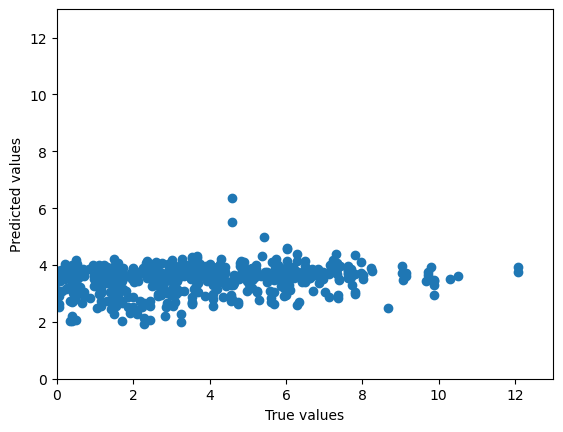

In [15]:
plt.scatter(_Y, _pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 13])
plt.ylim([0, 13])
#plt.plot()
plt.plot()

In [16]:
_Y = pd.DataFrame(_Y)

In [17]:
#_pred = pd.DataFrame(_pred)

In [18]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


### Scatter plot- PCE

[]

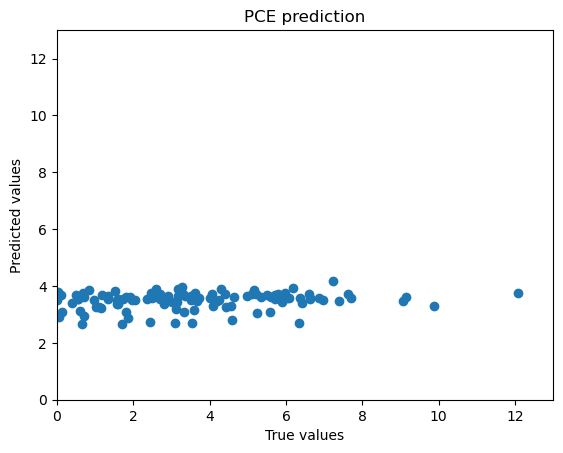

In [19]:
#Y_pred = model.predict(X_test).flatten()

#a = plt.axes(aspect='equal')
plt.scatter(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title("PCE prediction")
plt.xlim([0, 13])
plt.ylim([0, 13])
#plt.plot()
plt.plot()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [21]:
model = Sequential()
model.add(Dense(64, input_dim = 2, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [22]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)

In [23]:
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [24]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=300)

Epoch 1/300
12/12 [==============================] - 1s 14ms/step - loss: 18.6359 - mse: 18.6359 - mae: 3.5881 - val_loss: 9.8787 - val_mse: 9.8787 - val_mae: 2.4422
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 10.2296 - mse: 10.2296 - mae: 2.4989 - val_loss: 4.9372 - val_mse: 4.9372 - val_mae: 1.7970
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 7.6268 - mse: 7.6268 - mae: 2.2836 - val_loss: 5.4280 - val_mse: 5.4280 - val_mae: 1.9291
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 7.2254 - mse: 7.2254 - mae: 2.2118 - val_loss: 5.0003 - val_mse: 5.0003 - val_mae: 1.8033
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 6.8019 - mse: 6.8019 - mae: 2.0795 - val_loss: 4.9488 - val_mse: 4.9488 - val_mae: 1.8039
Epoch 6/300
12/12 [==============================] - 0s 6ms/step - loss: 7.0487 - mse: 7.0487 - mae: 2.1945 - val_loss: 5.0022 - val_mse: 5.0022 - val_mae: 1.8253
Epoch 7/300
12/12

Epoch 51/300
12/12 [==============================] - 0s 6ms/step - loss: 6.4376 - mse: 6.4376 - mae: 2.0830 - val_loss: 4.7863 - val_mse: 4.7863 - val_mae: 1.7630
Epoch 52/300
12/12 [==============================] - 0s 6ms/step - loss: 6.4466 - mse: 6.4466 - mae: 2.1017 - val_loss: 4.7956 - val_mse: 4.7956 - val_mae: 1.7650
Epoch 53/300
12/12 [==============================] - 0s 5ms/step - loss: 6.4523 - mse: 6.4523 - mae: 2.1007 - val_loss: 4.7817 - val_mse: 4.7817 - val_mae: 1.7648
Epoch 54/300
12/12 [==============================] - 0s 5ms/step - loss: 6.7128 - mse: 6.7128 - mae: 2.1254 - val_loss: 4.7698 - val_mse: 4.7698 - val_mae: 1.7575
Epoch 55/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0803 - mse: 6.0803 - mae: 2.0314 - val_loss: 4.7645 - val_mse: 4.7645 - val_mae: 1.7560
Epoch 56/300
12/12 [==============================] - 0s 5ms/step - loss: 6.5842 - mse: 6.5842 - mae: 2.1310 - val_loss: 4.7678 - val_mse: 4.7678 - val_mae: 1.7567
Epoch 57/300
12/

Epoch 101/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1582 - mse: 6.1582 - mae: 2.0551 - val_loss: 4.7088 - val_mse: 4.7088 - val_mae: 1.7420
Epoch 102/300
12/12 [==============================] - 0s 6ms/step - loss: 6.4110 - mse: 6.4110 - mae: 2.1072 - val_loss: 4.6629 - val_mse: 4.6629 - val_mae: 1.7289
Epoch 103/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1642 - mse: 6.1642 - mae: 2.0724 - val_loss: 4.6719 - val_mse: 4.6719 - val_mae: 1.7285
Epoch 104/300
12/12 [==============================] - 0s 5ms/step - loss: 6.4974 - mse: 6.4974 - mae: 2.0889 - val_loss: 4.6635 - val_mse: 4.6635 - val_mae: 1.7223
Epoch 105/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9858 - mse: 5.9858 - mae: 2.0490 - val_loss: 4.7271 - val_mse: 4.7271 - val_mae: 1.7453
Epoch 106/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8605 - mse: 5.8605 - mae: 2.0282 - val_loss: 4.6498 - val_mse: 4.6498 - val_mae: 1.7242
Epoch 107/

Epoch 151/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0356 - mse: 6.0356 - mae: 2.0080 - val_loss: 4.6192 - val_mse: 4.6192 - val_mae: 1.7109
Epoch 152/300
12/12 [==============================] - 0s 6ms/step - loss: 5.9477 - mse: 5.9477 - mae: 1.9955 - val_loss: 4.6433 - val_mse: 4.6433 - val_mae: 1.7133
Epoch 153/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1722 - mse: 6.1722 - mae: 2.0585 - val_loss: 4.8314 - val_mse: 4.8314 - val_mae: 1.7610
Epoch 154/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1251 - mse: 6.1251 - mae: 2.0412 - val_loss: 4.6116 - val_mse: 4.6116 - val_mae: 1.7052
Epoch 155/300
12/12 [==============================] - 0s 5ms/step - loss: 6.1132 - mse: 6.1132 - mae: 2.0370 - val_loss: 4.7199 - val_mse: 4.7199 - val_mae: 1.7354
Epoch 156/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0993 - mse: 6.0993 - mae: 2.0241 - val_loss: 4.7525 - val_mse: 4.7525 - val_mae: 1.7422
Epoch 157/

Epoch 201/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1924 - mse: 6.1924 - mae: 2.0697 - val_loss: 4.7156 - val_mse: 4.7156 - val_mae: 1.7360
Epoch 202/300
12/12 [==============================] - 0s 6ms/step - loss: 5.8165 - mse: 5.8165 - mae: 1.9888 - val_loss: 4.8519 - val_mse: 4.8519 - val_mae: 1.7657
Epoch 203/300
12/12 [==============================] - 0s 6ms/step - loss: 5.8803 - mse: 5.8803 - mae: 2.0076 - val_loss: 4.8052 - val_mse: 4.8052 - val_mae: 1.7561
Epoch 204/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1215 - mse: 6.1215 - mae: 2.0371 - val_loss: 4.6369 - val_mse: 4.6369 - val_mae: 1.7180
Epoch 205/300
12/12 [==============================] - 0s 6ms/step - loss: 6.0124 - mse: 6.0124 - mae: 2.0165 - val_loss: 4.7100 - val_mse: 4.7100 - val_mae: 1.7372
Epoch 206/300
12/12 [==============================] - 0s 6ms/step - loss: 5.9416 - mse: 5.9416 - mae: 2.0023 - val_loss: 4.6635 - val_mse: 4.6635 - val_mae: 1.7241
Epoch 207/

Epoch 251/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0813 - mse: 6.0813 - mae: 2.0215 - val_loss: 4.6455 - val_mse: 4.6455 - val_mae: 1.7223
Epoch 252/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0114 - mse: 6.0114 - mae: 2.0377 - val_loss: 4.8938 - val_mse: 4.8938 - val_mae: 1.7752
Epoch 253/300
12/12 [==============================] - 0s 6ms/step - loss: 6.1184 - mse: 6.1184 - mae: 2.0456 - val_loss: 4.7156 - val_mse: 4.7156 - val_mae: 1.7376
Epoch 254/300
12/12 [==============================] - 0s 5ms/step - loss: 5.9884 - mse: 5.9884 - mae: 2.0102 - val_loss: 4.7450 - val_mse: 4.7450 - val_mae: 1.7430
Epoch 255/300
12/12 [==============================] - 0s 5ms/step - loss: 6.0536 - mse: 6.0536 - mae: 2.0299 - val_loss: 4.6926 - val_mse: 4.6926 - val_mae: 1.7298
Epoch 256/300
12/12 [==============================] - 0s 6ms/step - loss: 6.0102 - mse: 6.0102 - mae: 2.0273 - val_loss: 4.8009 - val_mse: 4.8009 - val_mae: 1.7572
Epoch 257/

In [25]:
#history.history

### MAE: 5-fold-cross-validation:300-epochs

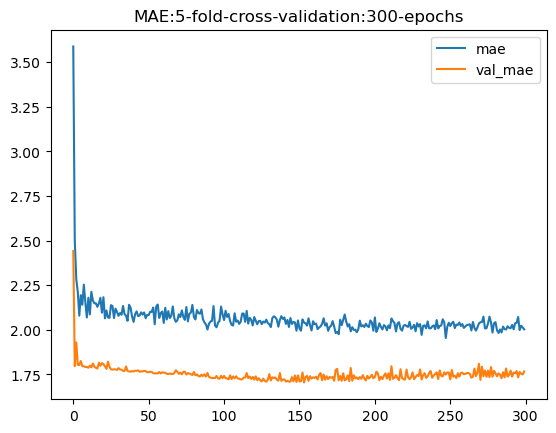

In [26]:
#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title("MAE:5-fold-cross-validation:300-epochs")

plt.legend()

In [27]:
scores = model.evaluate(X_test, Y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  5.567320346832275
Mean Absolute Error :  2.000476121902466


In [28]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [29]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(Y_test, Y_pred))

r2 score:  0.05643655330155217


In [30]:
Y_pred[:5]

array([[3.577827 ],
       [2.9034588],
       [3.506776 ],
       [3.7892752],
       [3.719362 ]], dtype=float32)

In [31]:
Y_test.head(5)

122    5.00
113    1.94
490    4.52
508    6.63
182    7.14
Name: PCE, dtype: float64

In [32]:
Y.max()

12.08

In [33]:
Y.min()

0.003

In [34]:
X['HOMO'].max()

-2.9391011538

In [35]:
X['HOMO'].min()

-5.7894932088

In [36]:
X['LUMO'].max()

-0.389122734

In [37]:
X['LUMO'].min()

-3.740204181

[]

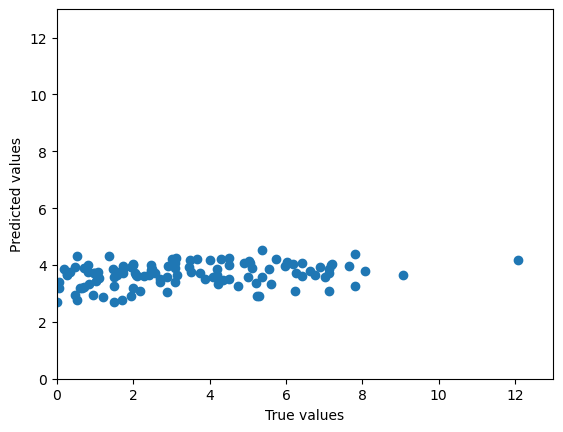

In [38]:
#Y_pred = model.predict(X_test).flatten()

#a = plt.axes(aspect='equal')
plt.scatter(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 13])
plt.ylim([0, 13])
#plt.plot()
plt.plot()

In [39]:
data_LSTM = df[['SMILES-DFP', 'PCE']]

In [40]:
maxPCE = data_LSTM['PCE'].max()
minPCE = data_LSTM['PCE'].min()
print(maxPCE, minPCE)

12.08 0.003


<AxesSubplot: ylabel='Frequency'>

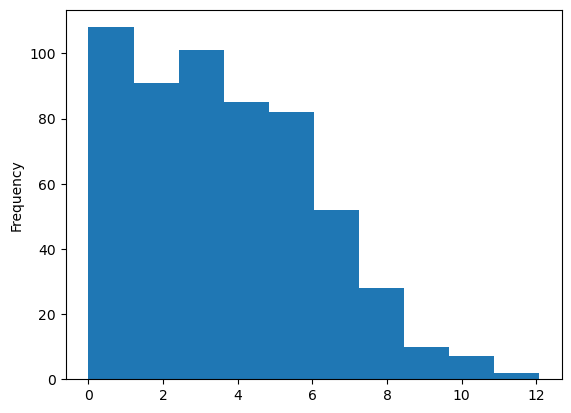

In [41]:
pce_val = data_LSTM["PCE"]
pce_val.plot(kind="hist")

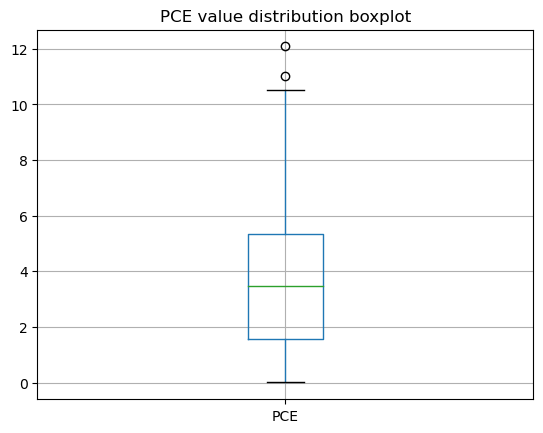

In [42]:
pce_val_bxplt = data_LSTM.boxplot(column = "PCE")
pce_val_bxplt.plot()
plt.title('PCE value distribution boxplot')
plt.show()

In [43]:
def categorise(row):  
    if row['PCE'] > 3.15:
        return 1
    elif row['PCE'] <=3.15:
        return 0

In [44]:
data_LSTM['LABEL'] = data_LSTM.apply(lambda row: categorise(row), axis=1)

/tmp/ipykernel_6565/1098605413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LSTM['LABEL'] = data_LSTM.apply(lambda row: categorise(row), axis=1)


In [45]:
data_LSTM.head(5)

,SMILES-DFP,PCE,LABEL
0,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...,1.36,0
1,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...,1.24,0
2,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...,3.16,1
3,[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...,2.10,0
4,[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...,2.70,0


In [46]:
data_LSTM.rename(columns = {'SMILES-DFP':'SMILES_DFP'}, inplace = True)

/tmp/ipykernel_6565/3610042035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LSTM.rename(columns = {'SMILES-DFP':'SMILES_DFP'}, inplace = True)


In [47]:
X_LSTM = data_LSTM['SMILES_DFP']
Y_LSTM = data_LSTM['LABEL']

In [48]:
vocab_size = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    vocab_size, filters="", char_level=True
)
tokenizer.fit_on_texts(X_LSTM)

In [49]:
# now get padded sequences
seqs = tokenizer.texts_to_sequences(X_LSTM)
padded_seqs = tf.keras.preprocessing.sequence.pad_sequences(seqs, padding="post")

In [50]:
x_train, x_test, y_train, y_test = train_test_split(padded_seqs, Y_LSTM, test_size = .20)

In [51]:
model = tf.keras.Sequential()

In [52]:
# make embedding and indicate that 0 should be treated as padding mask
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50, mask_zero=True))
model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(25, return_sequences= True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          50000     
                                                                 
 lstm (LSTM)                 (None, None, 100)         60400     
                                                                 
 dropout_24 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          30200     
                                                                 
 dropout_25 (Dropout)        (None, None, 50)          0         
                                                                 
 lstm_2 (LSTM)               (None, None, 25)          7600      
                                                                 
 dropout_26 (Dropout)        (None, None, 25)         

In [53]:
_optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [54]:
model.compile(loss='binary_crossentropy', optimizer=_optimizer, metrics=['accuracy'])

In [55]:
result = model.fit(x_train, y_train, validation_split=0.2, batch_size = 90, epochs=5, verbose=1)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5


ValueError: in user code:

    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/losses.py", line 170, in __call__
        return losses_utils.compute_weighted_loss(
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/utils/losses_utils.py", line 350, in compute_weighted_loss
        ) = squeeze_or_expand_dimensions(losses, None, sample_weight)
    File "/home/dipika/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/utils/losses_utils.py", line 224, in squeeze_or_expand_dimensions
        sample_weight = tf.squeeze(sample_weight, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10240 for '{{node binary_crossentropy/weighted_loss/Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](binary_crossentropy/mul_3)' with input shapes: [?,10240].


In [ ]:
result.history

In [ ]:
#result.history
# Visualize history
# Plot history: Loss
plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='validation')
plt.title('Loss history')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
#result.history
# Visualize history
# Plot history: Loss
plt.plot(result.history['accuracy'], label='train')
plt.plot(result.history['val_accuracy'], label='validation')
plt.title('Accuracy history')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
from pysmiles import read_smiles
import networkx as nx
    
smiles = 'C12=C3C4=C5C6=C1C7=C8C9=C1C%10=C%11C(=C29)C3=C2C3=C4C4=C5C5=C9C6=C7C6=C7C8=C1C1=C8C%10=C%10C%11=C2C2=C3C3=C4C4=C5C5=C%11C%12=C(C6=C95)C7=C1C1=C%12C5=C%11C4=C3C3=C5C(=C81)C%10=C23'
mol = read_smiles(smiles)
    
# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol))

In [ ]:
import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')